In [1]:
import diplib as dip
import numpy as np
import os
import matplotlib.pyplot as plt

img_folder = 'images'

DIPlib -- a quantitative image analysis library
Version 3.4.3 (Mar 21 2024)
For more information see https://diplib.org


In [147]:
# Image loading
img = dip.ImageReadTIFF(f'{img_folder}/CamIm01.tif')

# Thresholding
bin_img = 255 - dip.OtsuThreshold(img)
bin_img2 = dip.Closing(bin_img, dip.SE([20, 20]))

# Segmentation
edge_img = dip.Abs(dip.SobelGradient(bin_img2, dimension=1))

# Artifact Exclusion
mask = dip.Threshold(edge_img)[0]
mask = dip.Dilation(mask, 5)
mask = dip.AreaOpening(mask, filterSize=2000)
mask = dip.Dilation(mask, 5)

# Measurements
labeled_mask = dip.Label(mask)
msr = dip.MeasurementTool.Measure(labeled_mask, edge_img, ['Gravity','GreyMajorAxes'])
coords = np.array([msr[i+1]['Gravity'] for i in range(msr.NumberOfObjects())])
msr

<Measurement with 3 features for 27 objects>

[2584, 1936]

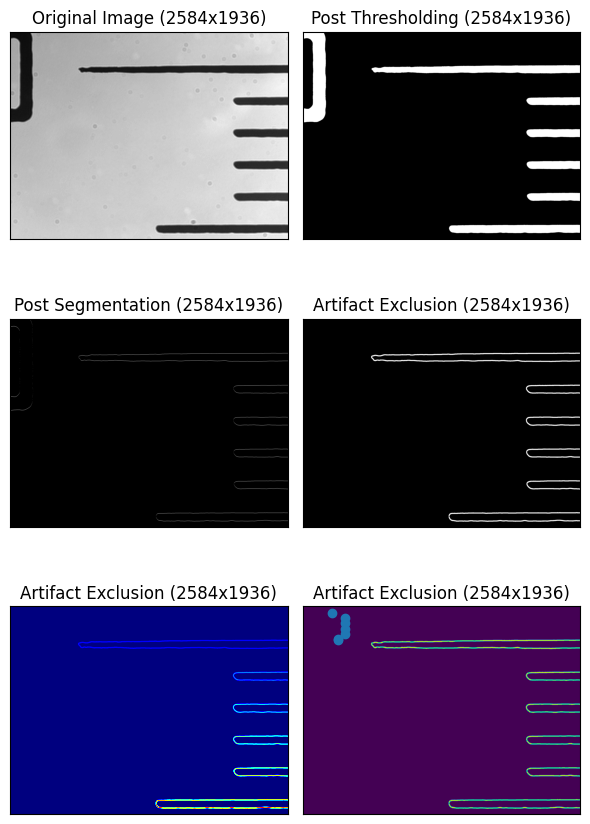

In [146]:
fig, axs = plt.subplots(3, 2, figsize=(6, 9))
axs = axs.flatten()
axs[0].imshow(img, cmap='gray')
axs[0].set_title(f'Original Image ({img.Sizes()[0]}x{img.Sizes()[1]})')
axs[1].imshow(bin_img, cmap='gray')
axs[1].set_title(f'Post Thresholding ({bin_img.Sizes()[0]}x{bin_img.Sizes()[1]})')
axs[2].imshow(edge_img, cmap='gray')
axs[2].set_title(f'Post Segmentation ({edge_img.Sizes()[0]}x{edge_img.Sizes()[1]})')
axs[3].imshow(mask, cmap='gray')
axs[3].set_title(f'Artifact Exclusion ({mask.Sizes()[0]}x{mask.Sizes()[1]})')

axs[4].imshow(labeled_mask, cmap='jet')
axs[4].set_title(f'Artifact Exclusion ({labeled_mask.Sizes()[0]}x{labeled_mask.Sizes()[1]})')

axs[5].imshow(mask)
axs[5].set_title(f'Artifact Exclusion ({mask.Sizes()[0]}x{mask.Sizes()[1]})')
axs[5].scatter(coords[:, 0], coords[:, 1])

for i in range(6):
    axs[i].axes.get_xaxis().set_visible(False)
    axs[i].axes.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

In [106]:
coords

array([[272.62664492,  60.47261222],
       [394.46191667, 110.50845833],
       [394.46191667, 160.79725   ],
       [394.67354105, 211.12684339],
       [394.88524917, 261.22780649],
       [333.58663217, 305.67861505],
       [333.58663217, 318.05347297]])

In [101]:
y_coords = np.array([msr[i+1]['Gravity'][1] for i in range(msr.NumberOfObjects())])
distances = (y_coords - np.roll(y_coords, 1))[1:]
print(f"Distances: {distances.mean():.2f} ± {distances.std():.2f}")

Distances: 19.83 ± 0.05
